# **_MNIST Classification with Convolutional Neural Networks (CNN)_**

## Overview

In this notebook, we will demonstrate how to build a Convolutional Neural Network (CNN) for classifying handwritten digits from the MNIST dataset. The CNN will be trained using TensorFlow and Keras, and we'll evaluate its performance on custom images drawn by the user. This notebook is divided into the following main steps:

1. **Importing Libraries**: We will start by importing the necessary libraries required for the project.
2. **Downloading and Preparing the Dataset**: We'll load the MNIST dataset using TensorFlow's built-in dataset API and preprocess the images.
3. **Model Building**: We'll create a Convolutional Neural Network (CNN) using TensorFlow's Keras API.
4. **Model Training**: The CNN will be trained using the prepared dataset.
5. **Testing the Model**: Finally, we will test the trained model on new, custom images that we provide, and check its performance.

## Procedure

### **_1. Importing Necessary Libraries_**
Before we begin the main process of building and training our Convolutional Neural Network (CNN) for digit classification on the MNIST dataset, we first need to import the essential libraries. Here's a breakdown of the libraries used in this project:

In [13]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

**_tensorflow:_** The primary library for building and training the CNN model.  
**_cv2:_** Used for image processing tasks like loading, resizing, and manipulating images.  
**_matplotlib.pyplot:_** Used for visualizing images and displaying results.  
**_numpy:_** For numerical operations, particularly for handling image arrays.  
**_os:_** For file system operations, such as checking directories or loading custom images.


### **_2. Loading the MNIST Dataset_**
We will now load the MNIST dataset, which contains images of handwritten digits (0-9). The dataset is available in TensorFlow and can be easily imported for training and testing our model.

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

The MNIST dataset contains grayscale images of handwritten digits (0-9). Each image is 28x28 pixels, represented by values ranging from 0 (black) to 255 (white).

- **`x_train` and `x_test`**: These are the sets of images used for training and testing, respectively. `x_train` contains 60,000 images, and `x_test` contains 10,000. Each image in these arrays has a shape of `(28, 28)`.

- **`y_train` and `y_test`**: These arrays contain the labels for each image, indicating the digit (0-9) that each image represents. The labels are stored as integers, so a `y_train` or `y_test` entry corresponds to the digit shown in the associated `x_train` or `x_test` image.

*Note*: It's often helpful to normalize `x_train` and `x_test` by dividing by 255 to scale the pixel values to the range [0, 1], which can improve model training efficiency.

In [3]:
x_train = x_train/255.0
x_test = x_test/255.0

### **_3. Model building_**

#### _Initializing the Model_

To build our Convolutional Neural Network (CNN) model, we start by initializing a **Sequential** model.

In [4]:
model = tf.keras.models.Sequential()

This initializes a linear stack of layers, where each layer has exactly one input tensor and one output tensor. It’s ideal for a model that progresses layer by layer in a simple feed-forward manner.  
Using a Sequential model is a straightforward way to build a CNN by adding layers one after the other, which we will do in the following steps.

#### _Adding a Convolutional Layer_
In a standard Artificial Neural Network (ANN), we feed the entire image directly into fully connected layers. However, with image data, it’s often more effective to **extract important features first** to simplify the learning process. That’s where **Convolutional Layers** come in.

In [5]:
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

This layer performs convolutions on the input image, using **32 filters** (also called kernels) that each scan across the image in **3x3 blocks**. Each filter learns to detect specific features (like edges or textures) as it scans through the image.  
   - **`activation='relu'`**: The ReLU activation function introduces non-linearity, allowing the network to learn complex patterns.  
   - **`input_shape=(28, 28, 1)`**: Specifies the shape of the input data. Here, `(28, 28, 1)` represents a 28x28 pixel grayscale image. The `1` indicates that the images are grayscale (single channel).  

Adding this Conv2D layer allows the model to focus on important visual features first, before passing this feature-rich data to the rest of the network for classification.  


#### _Adding a Pooling Layer_

After applying **32 filters** in the first convolutional layer, we end up with 32 versions of the original image, each highlighting different features. This increases the number of parameters and the complexity of the data, which could slow down processing and make the model prone to overfitting.

To manage this, we use **MaxPooling**, which helps in **reducing the dimensionality** of each feature map while retaining the most important information.


In [6]:
model.add(tf.keras.layers.MaxPooling2D((2, 2))) 

  - **MaxPooling2D layer**: This layer downsamples each feature map by taking the maximum value in each **2x2 block**. By focusing on the strongest feature in each small region, we keep key information while discarding less relevant details.
  - **Reducing Parameters**: Pooling reduces the size of each feature map, helping control the number of parameters the network must process, which also improves training efficiency.

By adding MaxPooling, we simplify the feature maps, keeping only the strongest signals and reducing computational requirements, while preserving essential image features for later layers.


#### _Adding a Second Convolutional Layer (Optional)_

While adding a second convolutional layer is optional, it typically enhances the model’s ability to detect **more complex features** in the images. 

In the **first convolutional layer**, the network learns to identify basic patterns, such as **horizontal and vertical lines or simple edges**. However, with a second layer, the model can start to capture more intricate patterns like **curves and corners**, which are essential for understanding more complex shapes in the image.

In [7]:
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

- This layer has **64 filters**, each scanning for slightly more advanced features than the first layer.

### Transitioning Back to an ANN Workflow

After extracting features using the convolutional and pooling layers, the rest of the process mirrors the steps followed in a standard **Artificial Neural Network (ANN)**:

In [8]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

a = model.evaluate(x_test, y_test)
print(a)

model.save('cnndigitrecog.h5')
print("Trained and saved")

Epoch 1/5
1875/1875 [==============================] - 39s 20ms/step - loss: 0.1277 - accuracy: 0.9613
Epoch 2/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0428 - accuracy: 0.9865
Epoch 3/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0281 - accuracy: 0.9913
Epoch 4/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0209 - accuracy: 0.9932
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 0.0345 - accuracy: 0.9894
[0.03452563285827637, 0.9894000291824341]
Trained and saved


/home/akbar/miniconda3/envs/ml_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Loading the model
Now  we can load the model and use it to predict handwritten digits

In [9]:
digit_recognizer = tf.keras.models.load_model('cnndigitrecog.h5')
# print("loaded from cache")

Now we upload custom images using open-cv, and reshape the images to (28, 28). If the image is a colored image, we have to convert it into gray-scale one. We create custom images as a tensorflow list, that has the same form of *x_test* or *x_train*.

In [14]:
custom_images = []
for i in range(1, 10):
    img = cv2.imread(f"{i}.jpg")
    img=cv2.resize(img, (28, 28))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = np.uint8(255-img)
    custom_images.append(img)

custom_images = np.array(custom_images)
# print(np.shape(custom_images))


custom_images = tf.constant(custom_images, dtype=tf.float32)
pridictions = digit_recognizer.predict([custom_images])
# print(len(pridictions))

1/1 [==============================] - 0s 87ms/step


### Displaying the results

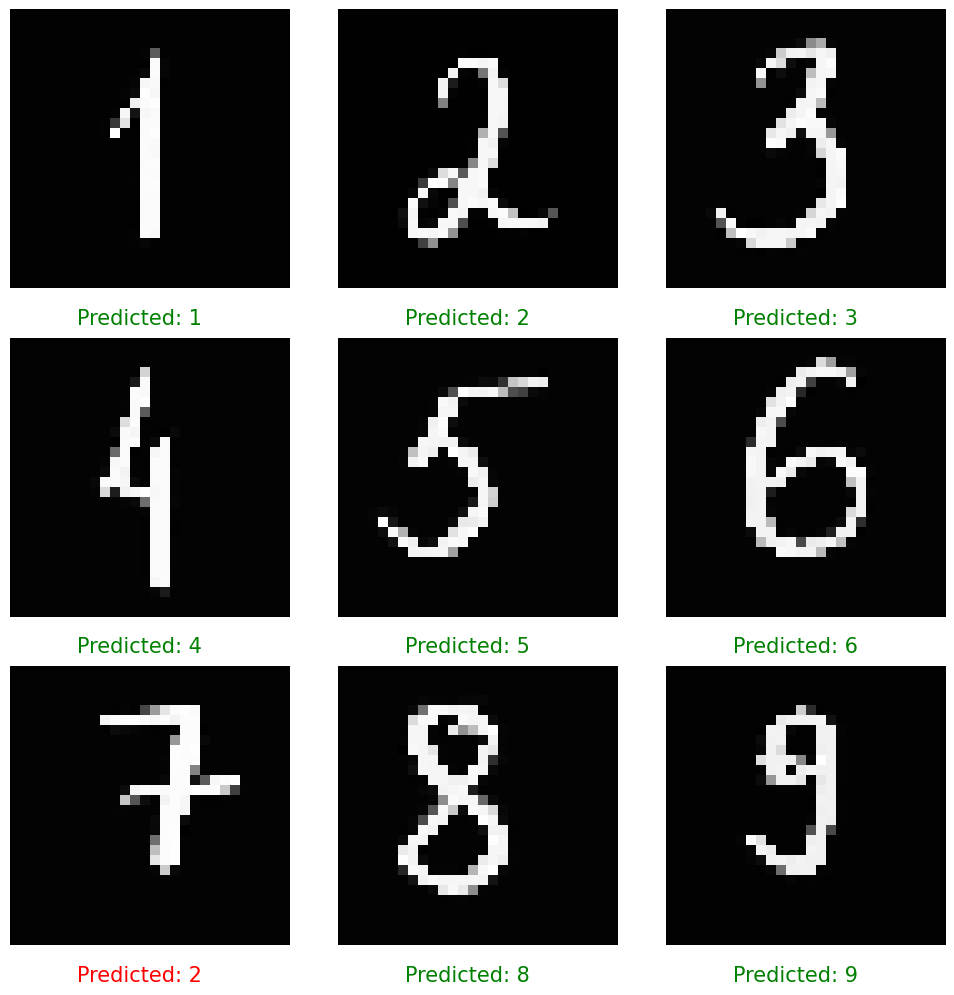

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))  # Adjust the size as needed

# Flatten the axes array to easily iterate over it
axes = axes.flatten()

# Display each image in the corresponding subplot
for i in range(9):
    axes[i].imshow(custom_images[i], cmap='gray')
    axes[i].axis('off')  # Hide the axis for better visualization
    # axes[i].set_title(f"True value: {i + 1}")
    # axes[i].set_xlabel(f"Predicted: {pridictions[i]}")
    if i+1==np.argmax(pridictions[i]):
        rang = "green"
    else:
        rang = "red"
    axes[i].text(12.5, 30.5, f"Predicted: {np.argmax(pridictions[i])}", ha='center', va='center',  fontsize=15, color=rang)


# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()